Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports,
technology, food, books, etc.).
1. Convert text to lowercase and remove punctuaƟon using re.
2. Tokenize the text into words and sentences.
3. Split using split() and word_tokenize() and compare how Python split and NLTK’s
word_tokenize() differ.
4. Remove stopwords (using NLTK's stopwords list).
5. Display word frequency distribuƟon (excluding stopwords).

In [2]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the Punkt Sentence Tokenizer models

# 1. Unique Paragraph
text = "I love reading about artificial intelligence. It's fascinating to learn how machines mimic human behavior. Neural networks and deep learning are my favorite topics. They have revolutionized image recognition and natural language processing. AI is shaping the future in exciting ways!"

# 2. Lowercase and Remove Punctuation
clean_text = re.sub(r'[^\w\s]', '', text.lower())

# 3. Tokenization
words_split = clean_text.split()
words_tokenized = word_tokenize(clean_text)
sentences = sent_tokenize(text)

print("Split Words:", words_split)
print("Tokenized Words:", words_tokenized)
print("Sentences:", sentences)

# 4. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [w for w in words_tokenized if w not in stop_words]

# 5. Frequency Distribution
word_freq = Counter(filtered_words)
print("Word Frequency (No Stopwords):", word_freq)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Split Words: ['i', 'love', 'reading', 'about', 'artificial', 'intelligence', 'its', 'fascinating', 'to', 'learn', 'how', 'machines', 'mimic', 'human', 'behavior', 'neural', 'networks', 'and', 'deep', 'learning', 'are', 'my', 'favorite', 'topics', 'they', 'have', 'revolutionized', 'image', 'recognition', 'and', 'natural', 'language', 'processing', 'ai', 'is', 'shaping', 'the', 'future', 'in', 'exciting', 'ways']
Tokenized Words: ['i', 'love', 'reading', 'about', 'artificial', 'intelligence', 'its', 'fascinating', 'to', 'learn', 'how', 'machines', 'mimic', 'human', 'behavior', 'neural', 'networks', 'and', 'deep', 'learning', 'are', 'my', 'favorite', 'topics', 'they', 'have', 'revolutionized', 'image', 'recognition', 'and', 'natural', 'language', 'processing', 'ai', 'is', 'shaping', 'the', 'future', 'in', 'exciting', 'ways']
Sentences: ['I love reading about artificial intelligence.', "It's fascinating to learn how machines mimic human behavior.", 'Neural networks and deep learning are my

Q2. Using the same paragraph from Q1:
1. Extract all words with only alphabets using re.findall()
2. Remove stop words using NLTK’s stopword list
3. Perform stemming with PorterStemmer
4. Perform lemmaƟzaƟon with WordNetLemmaƟzer
5. Compare the stemmed and lemmaƟzed outputs and explain when you’d prefer one over
the other.

In [3]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

# 1. Extract words with only alphabets
alpha_words = re.findall(r'\b[a-zA-Z]+\b', clean_text)

# 2. Remove stopwords again
filtered_alpha = [w for w in alpha_words if w not in stop_words]

# 3. Stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(w) for w in filtered_alpha]

# 4. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(w) for w in filtered_alpha]

print("Stemmed Words:", stemmed_words)
print("Lemmatized Words:", lemmatized_words)

# 5. Comparison
print("\nStemming may distort words ('learning' → 'learn'), lemmatization keeps them meaningful. Use lemmatization when context or word form matters.")


[nltk_data] Downloading package wordnet to /root/nltk_data...


Stemmed Words: ['love', 'read', 'artifici', 'intellig', 'fascin', 'learn', 'machin', 'mimic', 'human', 'behavior', 'neural', 'network', 'deep', 'learn', 'favorit', 'topic', 'revolution', 'imag', 'recognit', 'natur', 'languag', 'process', 'ai', 'shape', 'futur', 'excit', 'way']
Lemmatized Words: ['love', 'reading', 'artificial', 'intelligence', 'fascinating', 'learn', 'machine', 'mimic', 'human', 'behavior', 'neural', 'network', 'deep', 'learning', 'favorite', 'topic', 'revolutionized', 'image', 'recognition', 'natural', 'language', 'processing', 'ai', 'shaping', 'future', 'exciting', 'way']

Stemming may distort words ('learning' → 'learn'), lemmatization keeps them meaningful. Use lemmatization when context or word form matters.


Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).
1. Use CountVectorizer to generate the Bag of Words representaƟon.
2. Use TfidfVectorizer to compute TF-IDF scores.
3. Print and interpret the top 3 keywords from each text using TF-IDF.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

texts = [
    "The phone has great battery life and camera quality.",
    "Amazing service at the restaurant, very friendly staff.",
    "The laptop crashed frequently and had poor performance."
]

# 1. Bag of Words
cv = CountVectorizer()
bow = cv.fit_transform(texts)
print("BoW Features:", cv.get_feature_names_out())

# 2. TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)

# 3. Top 3 keywords for each text
import numpy as np

for i, row in enumerate(tfidf_matrix.toarray()):
    top3 = np.argsort(row)[-3:]
    print(f"Text {i+1} Top Keywords:", [tfidf.get_feature_names_out()[j] for j in top3])


BoW Features: ['amazing' 'and' 'at' 'battery' 'camera' 'crashed' 'frequently' 'friendly'
 'great' 'had' 'has' 'laptop' 'life' 'performance' 'phone' 'poor'
 'quality' 'restaurant' 'service' 'staff' 'the' 'very']
Text 1 Top Keywords: ['has', 'battery', 'quality']
Text 2 Top Keywords: ['restaurant', 'staff', 'very']
Text 3 Top Keywords: ['laptop', 'crashed', 'frequently']


Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs
Blockchain).
1. Preprocess and tokenize both texts.
2. Calculate:
a. Jaccard Similarity using sets
b. Cosine Similarity using TfidfVectorizer + cosine_similarity()

c. Analyze which similarity metric gives beƩer insights in your case.

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

text1 = "Artificial Intelligence is transforming industries through automation and analytics."
text2 = "Blockchain ensures data integrity and decentralization in digital systems."

# Preprocessing
tokens1 = set(word_tokenize(re.sub(r'[^\w\s]', '', text1.lower())))
tokens2 = set(word_tokenize(re.sub(r'[^\w\s]', '', text2.lower())))

# a. Jaccard Similarity
jaccard = len(tokens1 & tokens2) / len(tokens1 | tokens2)
print("Jaccard Similarity:", jaccard)

# b. Cosine Similarity
tfidf = TfidfVectorizer()
tfidf_vecs = tfidf.fit_transform([text1, text2])
cos_sim = cosine_similarity(tfidf_vecs[0:1], tfidf_vecs[1:2])
print("Cosine Similarity:", cos_sim[0][0])

# c. Analysis
print("Cosine is better for nuanced similarity; Jaccard only checks for common tokens.")


Jaccard Similarity: 0.058823529411764705
Cosine Similarity: 0.05951439576030657
Cosine is better for nuanced similarity; Jaccard only checks for common tokens.


Q5. Write a short review for a product or service.
1. Use TextBlob or VADER to find polarity & subjecƟvity for each review.
2. Classify reviews into PosiƟve / NegaƟve / Neutral.
3. Create a word cloud using the wordcloud library for all posiƟve reviews.

Review: 'The product exceeded my expectations, very satisfied!' → Polarity: 0.8125, Sentiment: Positive
Review: 'Terrible quality and poor support, very disappointed.' → Polarity: -0.7916666666666666, Sentiment: Negative
Review: 'It was okay, nothing special but not bad either.' → Polarity: 0.40238095238095234, Sentiment: Positive


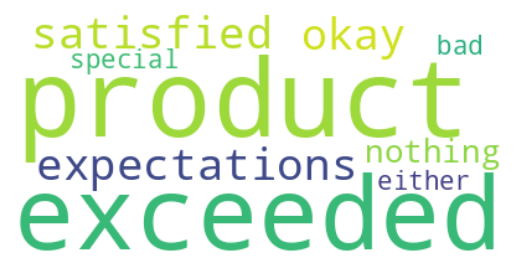

In [6]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = [
    "The product exceeded my expectations, very satisfied!",
    "Terrible quality and poor support, very disappointed.",
    "It was okay, nothing special but not bad either."
]

# 1 & 2. Polarity & Subjectivity
for r in reviews:
    blob = TextBlob(r)
    sentiment = "Positive" if blob.sentiment.polarity > 0 else "Negative" if blob.sentiment.polarity < 0 else "Neutral"
    print(f"Review: '{r}' → Polarity: {blob.sentiment.polarity}, Sentiment: {sentiment}")

# 3. Word Cloud (only for positive)
positive_reviews = " ".join([r for r in reviews if TextBlob(r).sentiment.polarity > 0])
wordcloud = WordCloud(background_color='white').generate(positive_reviews)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [8]:
!pip install tensorflow

In [12]:
!pip install keras

Q6. Choose your own paragraph (~100 words) as training data.
1. Tokenize text using Tokenizer() from keras.preprocessing.text
2. Create input sequences and build a simple LSTM or Dense model
3. Train the model and generate 2–3 new lines of text starƟng from any seed word you provide.

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

# 1. Paragraph
corpus = ["Artificial intelligence helps machines learn from data and improve over time. It powers smart assistants, recommendation systems, and much more."]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# 2. Create input sequences
input_sequences = []
for line in corpus:
    tokens = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(tokens)):
        seq = tokens[:i+1]
        input_sequences.append(seq)

max_seq_len = max(len(seq) for seq in input_sequences)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre'))

X = input_sequences[:, :-1]
y = np.array(input_sequences[:, -1])
y = np.eye(total_words)[y]  # One-hot encode output

# 3. Build Model
model = Sequential([
    Embedding(total_words, 10, input_length=max_seq_len - 1),
    LSTM(100),
    Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, verbose=0)

# Generate text
seed_text = "Artificial"
for _ in range(3):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_len - 1, padding='pre')
    predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print("Generated Text:", seed_text)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Generated Text: Artificial intelligence machines learn
